In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

#### Loading the dataset

In [6]:
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### EDA

In [7]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

#### Check for outliers

<Axes: >

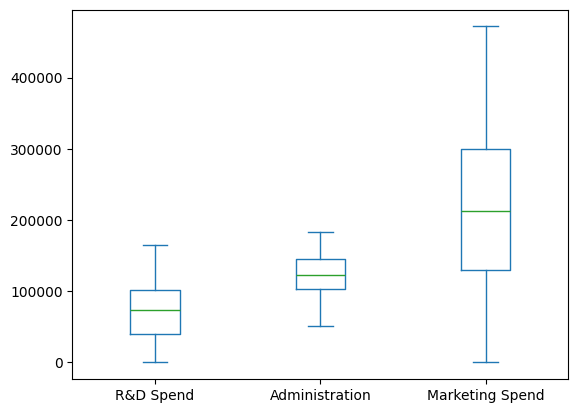

In [9]:
data[['R&D Spend','Administration','Marketing Spend']].plot(kind = 'box')

In [10]:
# Renaming the columns
data = data.rename(columns={
    'R&D Spend' : 'RND',
    'Administration' : 'ADMIN',
    'Marketing Spend' : 'MKT'
})
data.head()

,RND,ADMIN,MKT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


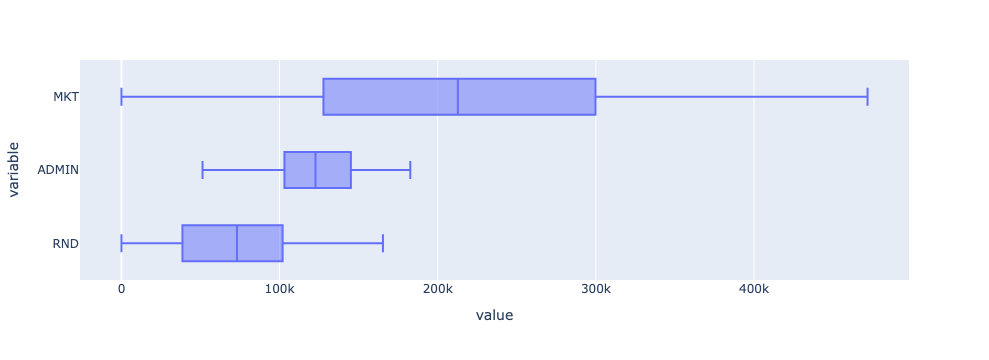

In [11]:
px.box(data, x = ['RND', 'ADMIN', 'MKT'])

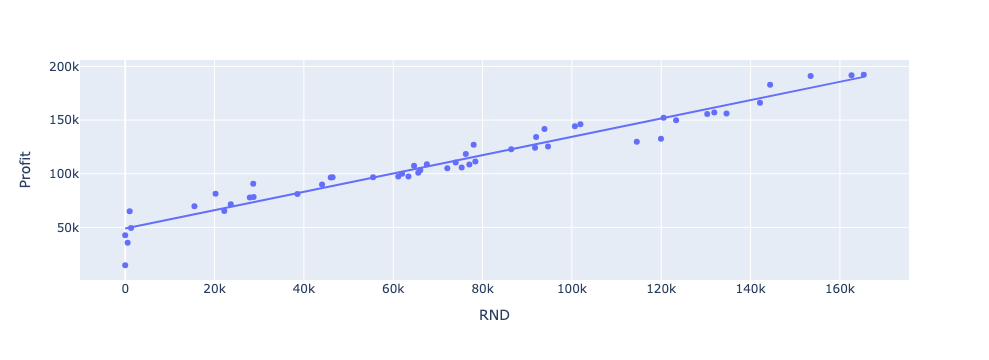

In [12]:
px.scatter(data, x = 'RND', y = 'Profit', trendline='ols')

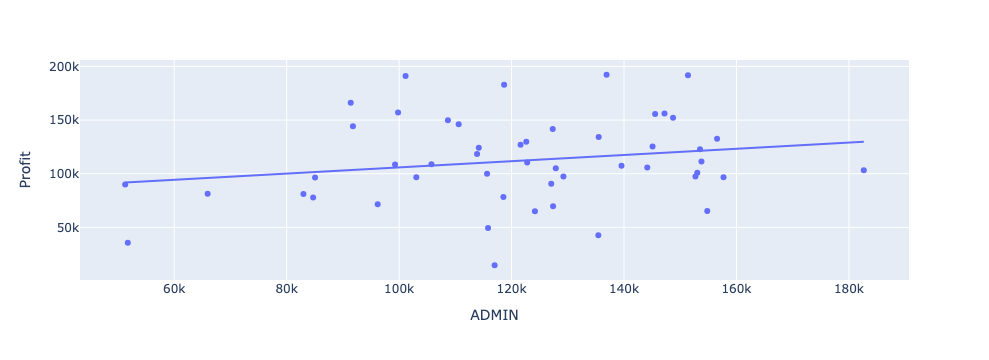

In [13]:
px.scatter(data, x = 'ADMIN', y = 'Profit', trendline='ols')

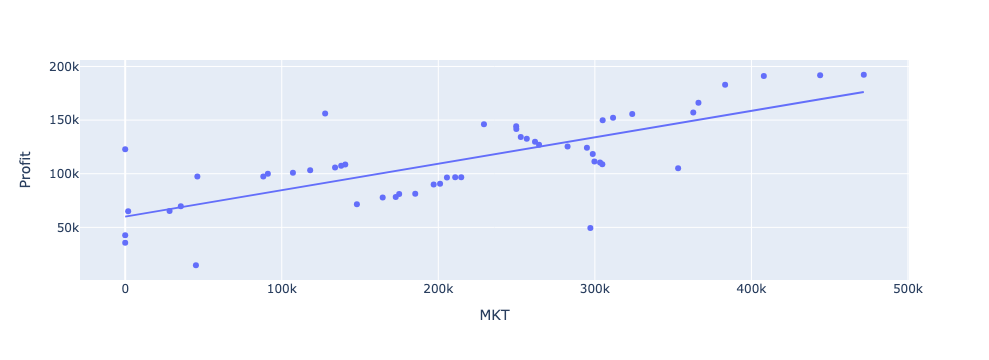

In [14]:
px.scatter(data, x = 'MKT', y = 'Profit', trendline='ols')

In [15]:
# Heatmap

<Axes: >

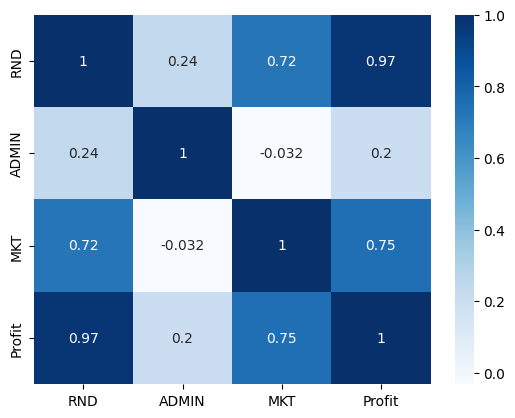

In [16]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')

In [17]:
# Correlation between ADMIN and Profit is low

In [18]:
# Check for negative values

In [19]:
data[ data['RND'] < 0]

,RND,ADMIN,MKT,State,Profit


In [20]:
data[ data['ADMIN'] < 0]

,RND,ADMIN,MKT,State,Profit


In [21]:
data[ data['MKT'] < 0]

,RND,ADMIN,MKT,State,Profit


In [22]:
data[ data['Profit'] < 0]

,RND,ADMIN,MKT,State,Profit


In [23]:
# working with columns
data.columns

Index(['RND', 'ADMIN', 'MKT', 'State', 'Profit'], dtype='object')

In [24]:
# convert string column to integer
data['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [26]:
object_cols = data.select_dtypes(include='object').columns
object_cols

Index(['State'], dtype='object')

In [27]:
le = LabelEncoder()
for col in object_cols:
    data[col] = le.fit_transform(data[col])

data.head()

,RND,ADMIN,MKT,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [28]:
X = data.drop(['ADMIN', 'Profit'], axis = 1)
y = data['Profit']

In [29]:
X.head()

,RND,MKT,State
0,165349.20,471784.10,2
1,162597.70,443898.53,0
2,153441.51,407934.54,1
3,144372.41,383199.62,2
4,142107.34,366168.42,1


In [30]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [31]:
# split the dataset into Train and Test in ration 70:30

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
# Create the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
print('Training Acc:', model.score(X_train, y_train))

Training Acc: 0.944191282542513


In [35]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print('Testing Acc:', r2_score(y_test, y_pred))

Testing Acc: 0.9585826456197128


In [36]:
rnd = float(input('Enter RND spend of the new company:'))
mkt = float(input('Enter MKT spend of the new company:'))
st = int(input('Enter state 0-California, 1-Florida, 2-NewYork: '))
pred = model.predict([[rnd, mkt, st]])
print('Estimated profit of the new company could be: ', pred[0])

Enter RND spend of the new company: 100000
Enter MKT spend of the new company: 20000
Enter state 0-California, 1-Florida, 2-NewYork:  2


Estimated profit of the new company could be:  129290.15350691686


In [34]:
# Thumb Rule -
# Each Independent Variable should have good correlation with Dependent Variable
# and Independent Variables should ideally not be correlated with eachother